# Thesis 2020-2021: N-Grams model 

In this notebook, we will create an N-Grams model.

In [71]:
import pandas as pd
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt

In [72]:
import csv
    
df_train = pd.read_csv('data/hateval2019_en_train.csv')
df_dev = pd.read_csv('data/hateval2019_en_dev.csv')

df_train_dev = df_train.append(df_dev, ignore_index=True)
df_train_dev = df_train_dev.drop(['TR', 'AG'], axis=1)
df_train_dev

,id,text,HS
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1
1,202,Why would young fighting age men be the vast m...,1
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0
4,205,Orban in Brussels: European leaders are ignori...,0
...,...,...,...
9995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0
9996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1
9997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0
9998,19199,I hate bitches who talk about niggaz with kids...,1


In [73]:
df_test = pd.read_csv('data/hateval2019_en_test.csv')
df_test = df_test.drop(['TR', 'AG'], axis=1)
df_test

,id,text,HS
0,34243,"@local1025 @njdotcom @GovMurphy Oh, I could ha...",0
1,30593,Several of the wild fires in #california and #...,0
2,31427,@JudicialWatch My question is how do you reset...,0
3,31694,"#Europe, you've got a problem! We must hurry...",1
4,31865,This is outrageous! #StopIllegalImmigration #...,1
...,...,...,...
2995,31368,you can never take a L off a real bitch😩 im ho...,1
2996,30104,@Brian_202 likes to call me a cunt & a bitch b...,1
2997,31912,@kusha1a @Camio_the_wise @shoe0nhead 1. Never ...,1
2998,31000,If i see and know you a hoe why would i hit yo...,1


In [74]:
import re
from pattern.text.en import singularize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

tokenizer = TweetTokenizer()
stop_words = set(stopwords.words('english'))

# Create a function to clean the tweets
def cleanTxt(text):
    text = text.lower() # Convert everything to lower case
    text = re.sub(r'@[a-zA-Z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'rt[\s]+', '', text) # Remove RT (retweet symbol)
    text = re.sub(r'&amp;', 'and', text) # Replace '&amp;' by 'and'
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyper link  
    #text = re.sub(r'\d+', '0', text) # Replace all numbers by a zero
    text = " ".join([singularize(word) for word in tokenizer.tokenize(text) if word not in stop_words]) # Remove stopwords
    #text = " ".join([singularize(word) for word in text])
    text = re.sub(r'[^\w\s#]', ' ', text) # Remove all non-alphanumeric symbols (excluding whitespace and # characters)
    text = re.sub(r'\s+', ' ', text) # Replace multiple whitespaces by a single whitespace
    text = text.strip() # Remove whitespaces at the beginning and at the end
    
    return text

In [75]:
# Clean the data

df_train_dev['text_cleaned'] = df_train_dev['text'].apply(cleanTxt)
df_test['text_cleaned'] = df_test['text'].apply(cleanTxt)
df_train_dev

,id,text,HS,text_cleaned
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,hurray saving u many way #lockthemup #buildthe...
1,202,Why would young fighting age men be the vast m...,1,would young fighting age man vast majority one...
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,illegal dump kid border like road kill refuse ...
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,ny time s nearly white s state pose s array pr...
4,205,Orban in Brussels: European leaders are ignori...,0,orban brussel european leader ignoring person ...
...,...,...,...,...
9995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0,unfollowed fuck pussy
9996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME ...,1,stfu bitch go make satanic music u illuminatus...
9997,19198,"@2beornotbeing Honey, as a fellow white chick,...",0,honey fellow white chick let tell need shut fu...
9998,19199,I hate bitches who talk about niggaz with kids...,1,hate bitch talk niggaz kid everybody cant find...


In [76]:
X_train = df_train_dev.text_cleaned
X_test = df_test.text_cleaned
y_train = df_train_dev.HS
y_test = df_test.HS

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

vectorizer = CountVectorizer(ngram_range=(2,2)) # Convert a collection of text documents to a matrix of token counts
X_train_bigram_uncleaned = vectorizer.fit_transform(df_train_dev.text)
X_test_bigram_uncleaned = vectorizer.transform(df_test.text)

scaler = preprocessing.StandardScaler().fit(X_train_bigram_uncleaned.toarray())
X_train_scaled = scaler.transform(X_train_bigram_uncleaned.toarray())
X_test_scaled = scaler.transform(X_test_bigram_uncleaned.toarray())

# Evaluate the (uncleaned) bigram model using Logistic Regression as the classifier (without normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train_scaled, y_train)
y_predict = logreg.predict(X_test_scaled)

# Create new test dataframe
df_test_bigram_uncleaned = df_test.copy()
df_test_bigram_uncleaned['HS'] = y_predict

# Create prediction file for the bigram_logreg
df_test_bigram_uncleaned[['id', 'HS']].to_csv('predictions/bigram_logreg.tsv', sep='\t', index=False, header=False)
df_test_bigram_uncleaned[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the bigram_logreg
evaluate.write_eval("scores_bigram_logreg")

MemoryError: Unable to allocate 9.05 GiB for an array with shape (10000, 121406) and data type float64

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2)) # Convert a collection of text documents to a matrix of token counts
X_train_bigram = vectorizer.fit_transform(X_train)
X_test_bigram = vectorizer.transform(X_test)

In [11]:
print(vectorizer.get_feature_names()[4000:4050])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.toarray()

['almost like', 'almost nothing', 'almost seriously', 'almost three', 'aloe banged', 'alon damn', 'alone 10', 'alone according', 'alone aka', 'alone animated', 'alone annoying', 'alone benefit', 'alone broad', 'alone cannot', 'alone capital', 'alone cros', 'alone cunt', 'alone done', 'alone dont', 'alone end', 'alone forever', 'alone good', 'alone got', 'alone hangtown', 'alone italian', 'alone leave', 'alone loser', 'alone man', 'alone mind', 'alone nobody', 'alone pay', 'alone recount', 'alone rubbing', 'alone ur', 'alone we', 'alone whore', 'along artist', 'along border', 'along condition', 'along entire', 'along first', 'along foium', 'along gife', 'along growing', 'along lyric', 'along man', 'along melanium', 'along poor', 'along porou', 'along really']
(10000, 87110) (10000,) (3000, 87110) (3000,)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
# Normalize the data via StandardScaler

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train.toarray())
X_train_scaled = scaler.transform(X_train_bigram.toarray())
X_test_scaled = scaler.transform(X_test_bigram.toarray())

#clf_scaled = LogisticRegression().fit(X_train_scaled, y_train)
#y_scaled_predict = clf_scaled.predict(X_test_scaled)

In [10]:
# Evaluate the bigram model using Logistic Regression as the classifier (without normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train_bigram, y_train)
y_predict = logreg.predict(X_test_bigram)

# Create new test dataframe
df_test_bigram = df_test.copy()
df_test_bigram['HS'] = y_predict

# Create prediction file for the bigram_logreg
df_test_bigram[['id', 'HS']].to_csv('predictions/bigram_logreg.tsv', sep='\t', index=False, header=False)
df_test_bigram[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the bigram_logreg
evaluate.write_eval("scores_bigram_logreg")

taskA_fscore: 0.5705196847404321
taskA_precision: 0.5705037850179793
taskA_recall: 0.5716611932129174
taskA_accuracy: 0.5776666666666667


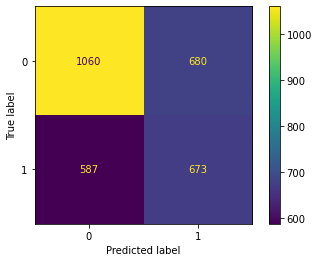

In [11]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test_bigram, y_test)
plt.show()

In [23]:
# Evaluate the bigram model using Logistic Regression as the classifier (+ normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook

logreg_scaled = LogisticRegression().fit(X_train_scaled, y_train)
y_predict_scaled = logreg_scaled.predict(X_test_scaled)

# Create new test dataframe
df_test_bigram_scaled = df_test.copy()
df_test_bigram_scaled['HS'] = y_predict_scaled

# Create prediction file for the bigram_scaled
df_test_bigram_scaled[['id', 'HS']].to_csv('predictions/bigram_scaled.tsv', sep='\t', index=False, header=False)
df_test_bigram_scaled[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the bigram_scaled
evaluate.write_eval("scores_bigram_scaled")

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


taskA_fscore: 0.5679948337809511
taskA_precision: 0.5682559550119314
taskA_recall: 0.5678297755883963
taskA_accuracy: 0.5803333333333334


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')
params = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ('newton-cg', 'lbfgs', 'liblinear'), 'penalty': ('l1', 'l2', 'elasticnet')}
grid = GridSearchCV(estimator=LogisticRegression(max_iter=500), param_grid=params, cv=5, scoring=f1, verbose=5, n_jobs=5)
grid.fit(X_train_bigram, y_train)
print("Best cross-validation score: ", grid.best_score_)
print("Best parameters: ", grid.best_params_)

In [50]:
# Evaluate the bigram model using optimized Logistic Regression as the classifier (+ normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook

logreg_scaled_opt = LogisticRegression(C=10).fit(X_train_bigram, y_train)
y_predict_opt = logreg_scaled_opt.predict(X_test_bigram)

# Create new test dataframe
df_test_bigram_opt = df_test.copy()
df_test_bigram_opt['HS'] = y_predict_opt

# Create prediction file for the bigram_opt
df_test_bigram_opt[['id', 'HS']].to_csv('predictions/bigram_opt.tsv', sep='\t', index=False, header=False)
df_test_bigram_opt[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the bigram_opt
evaluate.write_eval("scores_bigram_opt")

taskA_fscore: 0.5647339575176302
taskA_precision: 0.5660553839744591
taskA_recall: 0.5676929392446635
taskA_accuracy: 0.569


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Now let's try trigrams

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(3,3)) # Convert a collection of text documents to a matrix of token counts
X_train_trigram = vectorizer.fit_transform(X_train)
X_test_trigram = vectorizer.transform(X_test)

In [16]:
# Evaluate the trigram model using Logistic Regression as the classifier (without normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook
from sklearn.linear_model import LogisticRegression

logreg_trigram = LogisticRegression().fit(X_train_trigram, y_train)
y_predict_trigram = logreg_trigram.predict(X_test_trigram)

# Create new test dataframe
df_test_trigram = df_test.copy()
df_test_trigram['HS'] = y_predict_trigram

# Create prediction file for the trigram_logreg
df_test_trigram[['id', 'HS']].to_csv('predictions/trigram_logreg.tsv', sep='\t', index=False, header=False)
df_test_trigram[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the trigram_logreg
evaluate.write_eval("scores_bigram_logreg")

taskA_fscore: 0.478182636077373
taskA_precision: 0.5366013071895425
taskA_recall: 0.5191570881226054
taskA_accuracy: 0.5746666666666667


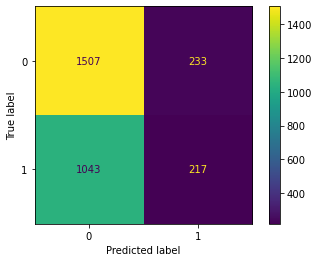

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_trigram, X_test_trigram, y_test)
plt.show()

In [68]:
# Normalize the data via StandardScaler

X_train_trigram = X_train_trigram.astype(np.int16)
X_test_trigram = X_test_trigram.astype(np.int16)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train_trigram.toarray())
X_train_trigram_scaled = scaler.transform(X_train_trigram.toarray())
X_test_trigram_scaled = scaler.transform(X_test_trigram.toarray())

In [70]:
# Evaluate the trigram model using Logistic Regression as the classifier (+ normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook
from sklearn.linear_model import LogisticRegression

logreg_trigram_scaled = LogisticRegression().fit(X_train_trigram_scaled, y_train)
y_predict_trigram_scaled = logreg_trigram_scaled.predict(X_test_trigram_scaled)

# Create new test dataframe
df_test_trigram_scaled = df_test.copy()
df_test_trigram_scaled['HS'] = y_predict_trigram_scaled

# Create prediction file for the trigram_logreg_scaled
df_test_trigram_scaled[['id', 'HS']].to_csv('predictions/trigram_logreg_scaled.tsv', sep='\t', index=False, header=False)
df_test_trigram_scaled[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the trigram_logreg_scaled
evaluate.write_eval("scores_trigram_logreg_scaled")

taskA_fscore: 0.4881516663662736
taskA_precision: 0.5381175769114588
taskA_recall: 0.5220443349753695
taskA_accuracy: 0.5743333333333334


## Now let's try bigrams and trigrams together

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,3)) # Convert a collection of text documents to a matrix of token counts
X_train_bt = vectorizer.fit_transform(X_train)
X_test_bt = vectorizer.transform(X_test)

X_train_bt = X_train_bt.astype(np.int8)
X_test_bt = X_test_bt.astype(np.int8)

In [15]:
# Evaluate the bigram-trigram model using Logistic Regression as the classifier (without normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook
from sklearn.linear_model import LogisticRegression

logreg_bt = LogisticRegression().fit(X_train_bt, y_train)
y_predict_bt = logreg_bt.predict(X_test_bt)

# Create new test dataframe
df_test_bt = df_test.copy()
df_test_bt['HS'] = y_predict_bt

# Create prediction file for the bigram_trigram_logreg
df_test_bt[['id', 'HS']].to_csv('predictions/bigram_trigram_logreg.tsv', sep='\t', index=False, header=False)
df_test_bt[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the bigram_trigram_logreg
evaluate.write_eval("scores_bigram_trigram_logreg")

taskA_fscore: 0.5656534218625722
taskA_precision: 0.5669749194339357
taskA_recall: 0.565407772304324
taskA_accuracy: 0.5813333333333334


## Now let's try four-grams

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(4,4)) # Convert a collection of text documents to a matrix of token counts
X_train_fourgram = vectorizer.fit_transform(X_train)
X_test_fourgram = vectorizer.transform(X_test)

In [26]:
# Evaluate the fourgram model using Logistic Regression as the classifier (without normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook
from sklearn.linear_model import LogisticRegression

logreg_fourgram = LogisticRegression().fit(X_train_fourgram, y_train)
y_predict_trigram = logreg_fourgram.predict(X_test_fourgram)

# Create new test dataframe
df_test_fourgram = df_test.copy()
df_test_fourgram['HS'] = y_predict_trigram

# Create prediction file for the fourgram_logreg
df_test_fourgram[['id', 'HS']].to_csv('predictions/fourgram_logreg.tsv', sep='\t', index=False, header=False)
df_test_fourgram[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the trigram_logreg
evaluate.write_eval("scores_fourgram_logreg")

taskA_fscore: 0.4564850539003197
taskA_precision: 0.521807355035428
taskA_recall: 0.5097016967706623
taskA_accuracy: 0.5696666666666667


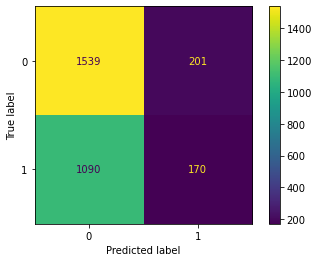

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_fourgram, X_test_fourgram, y_test)
plt.show()

## Now let's try five-grams

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(5,5)) # Convert a collection of text documents to a matrix of token counts
X_train_fivegram = vectorizer.fit_transform(X_train)
X_test_fivegram = vectorizer.transform(X_test)

In [29]:
# Evaluate the fivegram model using Logistic Regression as the classifier (without normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook
from sklearn.linear_model import LogisticRegression

logreg_fivegram = LogisticRegression().fit(X_train_fivegram, y_train)
y_predict_fivegram = logreg_fivegram.predict(X_test_fivegram)

# Create new test dataframe
df_test_fivegram = df_test.copy()
df_test_fivegram['HS'] = y_predict_fivegram

# Create prediction file for the fivegram_logreg
df_test_fivegram[['id', 'HS']].to_csv('predictions/fivegram_logreg.tsv', sep='\t', index=False, header=False)
df_test_fivegram[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the fivegram_logreg
evaluate.write_eval("scores_fivegram_logreg")

taskA_fscore: 0.4545873382958734
taskA_precision: 0.5230753539920787
taskA_recall: 0.5099069512862616
taskA_accuracy: 0.5706666666666667


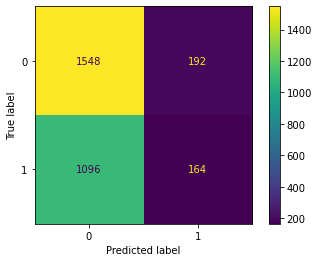

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_fivegram, X_test_fivegram, y_test)
plt.show()

## Let's try 2, 3, 4 and 5-grams together!

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,5)) # Convert a collection of text documents to a matrix of token counts
X_train_2_5 = vectorizer.fit_transform(X_train)
X_test_2_5 = vectorizer.transform(X_test)

In [24]:
# Evaluate the 2-5 grams model using Logistic Regression as the classifier (without normalizing input data)

import import_ipynb
import evaluate # here we import the local evaluate.ipynb jupyter notebook
from sklearn.linear_model import LogisticRegression

logreg_2_5 = LogisticRegression().fit(X_train_2_5, y_train)
y_predict_2_5 = logreg_2_5.predict(X_test_2_5)

# Create new test dataframe
df_test_2_5 = df_test.copy()
df_test_2_5['HS'] = y_predict_2_5

# Create prediction file for the bigram_5gram_logreg
df_test_2_5[['id', 'HS']].to_csv('predictions/bigram_5gram_logreg.tsv', sep='\t', index=False, header=False)
df_test_2_5[['id', 'HS']].to_csv('input/res/en_a.tsv', sep='\t', index=False, header=False)

# Evaluate the result of the bigram_5gram_logreg
evaluate.write_eval("scores_bigram_5gram_logreg")

taskA_fscore: 0.5482079150007719
taskA_precision: 0.5544640888586972
taskA_recall: 0.5500273672687466
taskA_accuracy: 0.5746666666666667
